### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
path = "/Users/ecem/Desktop/phonocardiogram/data/MV/absent"
waves = np.load(path + "/absent_MV_waves_10sec.npy", allow_pickle= True)

In [4]:
waves.shape

(5534, 40000)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

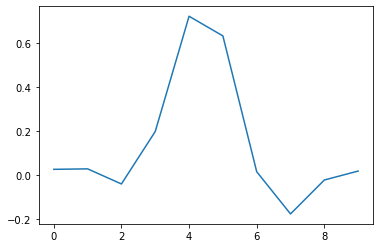

In [5]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(waves[0], w, level=6)

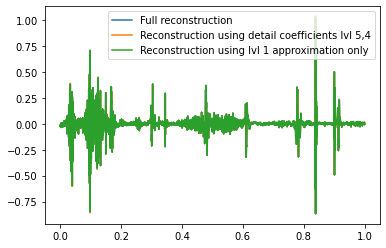

In [6]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

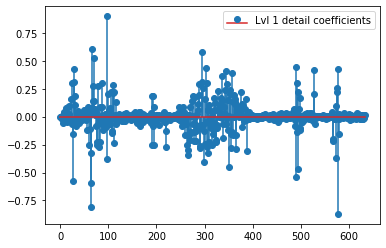

In [7]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

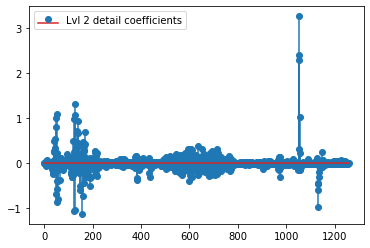

In [8]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


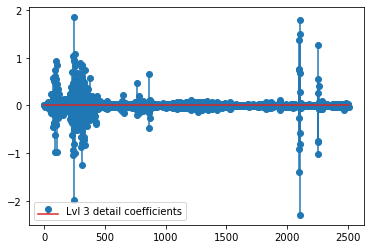

In [9]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


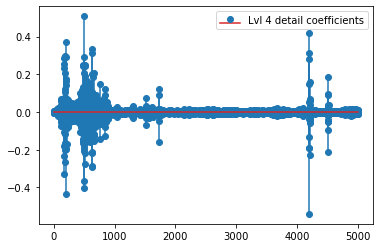

In [10]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


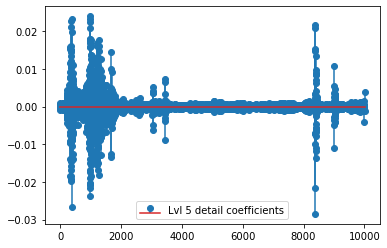

In [11]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


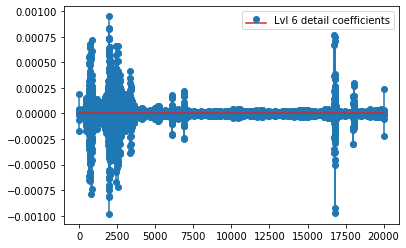

In [12]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [13]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(waves[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = waves[0] - approx_lvl1_interp

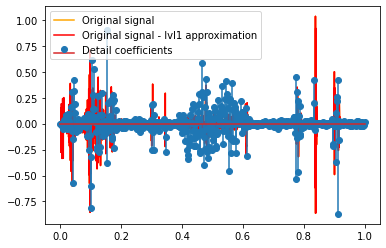

In [14]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(waves[0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [15]:
import pandas as pd

In [16]:
type(pywt.wavedec(waves[0], w, level=6))

list

In [17]:
coef = []
for i in range(len(waves)):
    coef.append(pywt.wavedec(waves[i], w, level=6))

In [18]:
for i in range(7):
    print(coef[0][i].shape)

(633,)
(633,)
(1258,)
(2508,)
(5007,)
(10006,)
(20004,)


In [19]:
coef[0]

[array([-1.87239558e-01, -1.82083368e-01, -1.80423871e-01, -1.77634567e-01,
        -1.33683950e-01, -1.21736266e-01,  4.06380594e-02,  1.98067836e-02,
        -7.31453598e-02, -3.53838801e-02,  2.85797138e-02, -1.13929482e-03,
         7.62950927e-02,  9.03142765e-02,  3.22477892e-02,  6.90027401e-02,
         1.17709145e-01, -1.49147743e-02, -7.09650144e-02, -3.84540632e-02,
        -2.86986567e-02,  4.23275046e-02, -3.38382125e-02,  1.31972104e-01,
        -1.19480602e-01,  8.40228796e-02,  1.38226310e-02, -1.07006840e-01,
        -8.54377598e-02, -4.71613370e-04,  3.12584229e-02,  7.96382502e-02,
         3.47628854e-02, -4.41746116e-02, -2.94063948e-02,  1.34541653e-02,
        -6.21209070e-02, -7.48214358e-03, -2.20487472e-02,  2.06829123e-02,
         8.17821641e-03, -3.28837591e-03,  3.23584825e-02, -1.87781843e-05,
         2.57194396e-02,  1.15211606e-02,  1.58783495e-02, -1.36324503e-02,
        -3.57417651e-02, -8.00971314e-03,  2.01315749e-02,  1.32481866e-02,
         7.6

In [20]:
coef[1]

[array([-5.05924709e-02, -5.89074120e-02, -5.24950959e-02, -2.67614555e-02,
         3.44359949e-02,  1.23160630e-02,  3.03416839e-03,  2.05191667e-03,
         3.88158225e-02, -2.62213070e-02,  2.00793259e-02, -5.60523290e-03,
         3.03693186e-03,  1.18435314e-02,  1.60315614e-02,  5.62120974e-03,
         1.79409813e-02,  1.13099879e-02,  1.43058132e-02,  2.59896759e-02,
         4.85601798e-02,  2.56274026e-02,  3.15084197e-02,  7.38763204e-03,
        -1.03202583e-02, -1.71310804e-03, -1.38494913e-02, -1.22375991e-02,
        -7.66867213e-03, -9.24250670e-03,  1.42500913e-02,  3.74176875e-02,
         8.54679123e-02,  6.78701922e-02,  2.48921104e-03,  2.49858927e-02,
        -5.23663945e-02, -9.71716121e-02, -5.77187166e-02,  3.56677175e-02,
         1.24864548e-01,  1.29058585e-01,  1.04363285e-01, -7.46422186e-02,
        -1.88901052e-01, -4.33064789e-01, -4.52178091e-01, -5.40099740e-01,
         1.71943140e+00,  1.61046743e+00, -6.28986597e-01, -6.62541330e-01,
        -9.9

### Level by level

In [21]:
def level_coef_extractor_3d(array, lvl = 0):
    array =np.array(array)
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [22]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [23]:
for i in range(7):
    saver(coef, i, path, 'absent_MV_wavelet_coef')


In [24]:
waves_ = np.load(path+ "/absent_MV_wavelet_coef_lvl_0.npy",  allow_pickle = True)

In [28]:
waves_.shape

(5534, 633)